In [3]:
import pandas as pd
data = pd.read_csv("fremont-bridge.csv", index_col= 'Date')
data.head()

,West,East
Date,,
10/3/2012 0:00,4.0,9.0
10/3/2012 1:00,4.0,6.0
10/3/2012 2:00,1.0,1.0
10/3/2012 3:00,2.0,3.0
10/3/2012 4:00,6.0,1.0


In [4]:
data['Total'] = data['West'] + data['East']

In [5]:
data.head()

,West,East,Total
Date,,,
10/3/2012 0:00,4.0,9.0,13.0
10/3/2012 1:00,4.0,6.0,10.0
10/3/2012 2:00,1.0,1.0,2.0
10/3/2012 3:00,2.0,3.0,5.0
10/3/2012 4:00,6.0,1.0,7.0


In [6]:
data.isna().sum()

West     8
East     8
Total    8
dtype: int64

In [7]:
data.dropna()

,West,East,Total
Date,,,
10/3/2012 0:00,4.0,9.0,13.0
10/3/2012 1:00,4.0,6.0,10.0
10/3/2012 2:00,1.0,1.0,2.0
10/3/2012 3:00,2.0,3.0,5.0
10/3/2012 4:00,6.0,1.0,7.0
...,...,...,...
12/31/2017 19:00,9.0,12.0,21.0
12/31/2017 20:00,6.0,8.0,14.0
12/31/2017 21:00,3.0,10.0,13.0


In [10]:
data.describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

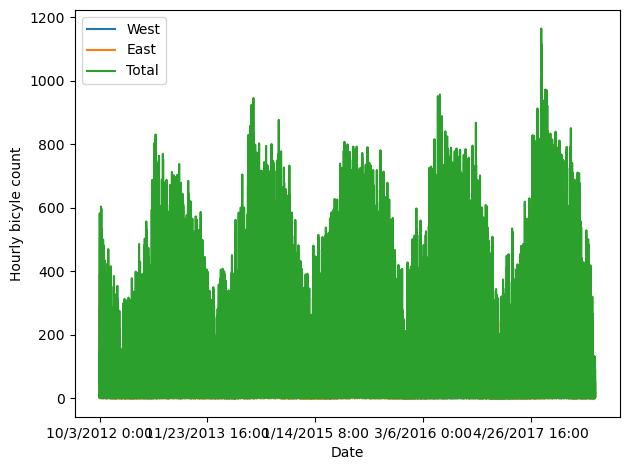

In [13]:
data.plot()
plt.ylabel('Hourly bicyle count')
plt.tight_layout()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45984 entries, 10/3/2012 0:00 to 12/31/2017 23:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   West    45976 non-null  float64
 1   East    45976 non-null  float64
 2   Total   45976 non-null  float64
dtypes: float64(3)
memory usage: 2.4+ MB


In [30]:
data['time']=pd.to_datetime(data.index, utc=True)

In [32]:
data['t1'] = pd.to_datetime(data['time']).dt.time

Text(0.5, 0, 'time in 24 hours')

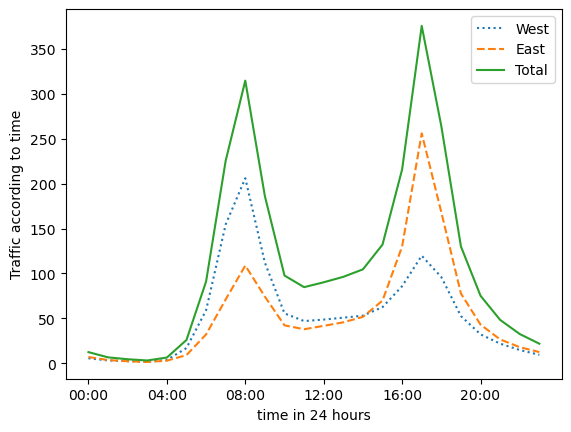

In [38]:
import numpy as np
by_time = data.groupby(data['t1']).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks,style=[':','--','-'])
plt.ylabel('Traffic according to time')
plt.xlabel('time in 24 hours')